### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings  
warnings.filterwarnings('ignore')  

In [2]:
# Load the CSV file(s) as reviews.

reviews = pd.read_csv('turtle_reviews.csv')
# View the DataFrame.
print(reviews.info())
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
print(reviews.shape)
reviews.info()

(2000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews.drop(['language', 'platform'], axis=1, inplace=True)

# View column names.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   product                 2000 non-null   int64  
 7   review                  2000 non-null   object 
 8   summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 3. Rename columns

In [7]:
# Rename the column headers.
reviews.rename(columns={'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'}, inplace=True)

# View column name
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews.to_csv('turtle_reviews_clean.csv')

In [9]:
# Import new CSV file with Pandas.

reviews = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
print(reviews.shape)
reviews.info()

(2000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


## 5. Linear regression

### 5a) spending vs loyalty

In [10]:
# Independent variable.
x1 = reviews['spending_score']

# Dependent variable.
y = reviews['loyalty_points']

# OLS model and summary.
f1 = 'y~x1'
test1 = ols(f1, data = reviews).fit()
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        13:29:16   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x1            33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Extract the estimated parameters.
 # Extract the estimated parameters.
print("Parameters: ", test1.params)  

# Extract the standard errors.
print("Standard errors: ", test1.bse)  

# Extract the predicted values.
print("Predicted values: ", test1.predict())  

Parameters:  Intercept   -75.052663
x1           33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x1            0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [12]:
# Set the X coefficient and the constant to generate the regression table.
y_pred1 = (33.062)*x1 + (-75.053)

# View the output.
y_pred1

0       1214.365
1       2602.969
2        123.319
3       2470.721
4       1247.427
          ...   
1995    2206.225
1996     189.443
1997    2933.589
1998     453.939
1999     189.443
Name: spending_score, Length: 2000, dtype: float64

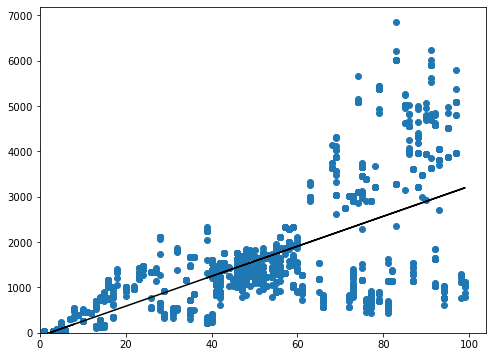

In [13]:
# Plot the graph with a regression line.
plt.figure(figsize=(8, 6))
plt.scatter(x1, y)

# Plot the regression line (in black).
plt.plot(x1, y_pred1, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) remuneration vs loyalty

In [14]:
# Independent variable.
x2 = reviews['remuneration']

# Dependent variable.
# OLS model and summary.
f2 = 'y~x2'
test2 = ols(f2, data = reviews).fit()
test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        13:29:18   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x2            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
 # Extract the estimated parameters.
print("Parameters: ", test2.params)  

# Extract the standard errors.
print("Standard errors: ", test2.bse)  

# Extract the predicted values.
print("Predicted values: ", test2.predict())  

Parameters:  Intercept   -65.686513
x2           34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x2            0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [16]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred2 = (34.188)*x2 + (-65.687)

# View the output.
y_pred2


0        354.82540
1        354.82540
2        382.85956
3        382.85956
4        410.89372
           ...    
1995    2821.83148
1996    3102.17308
1997    3102.17308
1998    3298.41220
1999    3102.17308
Name: remuneration, Length: 2000, dtype: float64

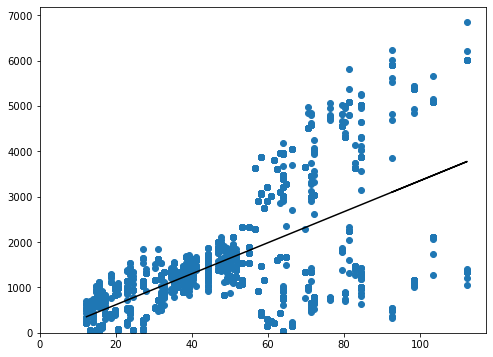

In [17]:
# Plot the graph with a regression line.
plt.figure(figsize=(8, 6))
plt.scatter(x2, y)

# Plot the regression line (in black).
plt.plot(x2, y_pred2, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

In [18]:
# Independent variable.
x3 = reviews['age']

# Dependent variable.
# OLS model and summary.
f3 = 'y~x3'
test3 = ols(f3, data = reviews).fit()
test3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 24 Apr 2023   Prob (F-statistic):             0.0577
Time:                        13:29:19   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x3            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
 # Extract the estimated parameters.
print("Parameters: ", test3.params)  

# Extract the standard errors.
print("Standard errors: ", test3.bse)  

# Extract the predicted values.
print("Predicted values: ", test3.predict())  

Parameters:  Intercept    1736.517739
x3             -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x3            2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [20]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred3 = (-4.013)*x2 + (1736.518)

# View the output.
y_pred3



0       1687.15810
1       1687.15810
2       1683.86744
3       1683.86744
4       1680.57678
           ...    
1995    1397.58002
1996    1364.67342
1997    1364.67342
1998    1341.63880
1999    1364.67342
Name: remuneration, Length: 2000, dtype: float64

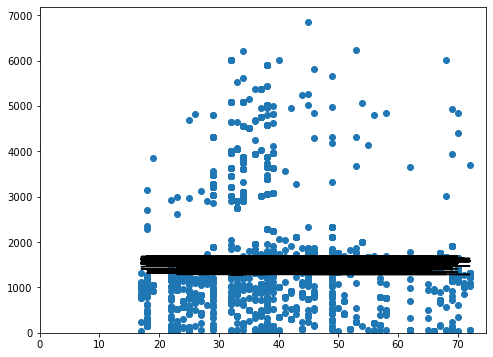

In [21]:
# Plot the graph with a regression line.
plt.figure(figsize=(8, 6))
plt.scatter(x3, y)

# Plot the regression line (in black).
plt.plot(x3, y_pred3, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

In [22]:
# Multiple Regression

In [23]:
#Defining our variables for multiple regression model
y_mlr = reviews['loyalty_points']

X_mlr = reviews[['spending_score','remuneration','age']]



In [24]:
# Specify the model.
multi = LinearRegression()  

# Fit the model.
multi.fit(X_mlr, y_mlr)


LinearRegression()

In [25]:
# Call the predictions for X (array).
multi.predict(X_mlr)

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

In [26]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", multi.score(X_mlr, y_mlr))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X_mlr, multi.coef_))

R-squared:  0.8399114912748795
Intercept:  -2203.059751307899
Coefficients:


[('spending_score', 34.18319657763365),
 ('remuneration', 34.00838549260247),
 ('age', 11.06065871184334)]

### Training and testing subsets with MLR

In [27]:
# Create train and test data sets.
X_train, X_test, y_train, y_test = train_test_split(X_mlr, y_mlr,
                                                    test_size=0.2,
                                                    random_state=42)

In [28]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2846.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:29:20   Log-Likelihood:                -12246.
No. Observations:                1600   AIC:                         2.450e+04
Df Residuals:                    1596   BIC:                         2.452e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2197.0105     58.134    -37.

In [29]:
print(multi.score(X_train, y_train)*100)

84.24398896169723


### Run regression test

In [30]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(X_train, y_train)

LinearRegression()

In [31]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [1581.73296854  796.88423068 2185.24039458 ... 1789.93373561 1399.81947689
 1437.21562445]


In [32]:
# Print the R-squared value.
print(mlr.score(X_test, y_test)*100)

82.90723396315803


### Check for multicollinearity

In [33]:
# Check multicollinearity.
X_temp = sm.add_constant(X_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(X_temp.values,
                                               i) for i in range(X_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = X_temp.columns

# Print the values to one decimal points.
print(vif.round(2))

   VIF Factor        features
0       20.73           const
1        1.06  spending_score
2        1.00    remuneration
3        1.06             age


In [34]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 39.20687709402362, 'LM Test p-value': 1.5690518681160543e-08, 'F-stat': 13.363756098044448, 'F-test p-value': 1.2899128216955065e-08}


In [35]:
# The p-value for the Breusch-Pagan test for heteroscedasticity is greater than 0.05 (hence we fail to reject 
# the null hypothesis) which shows that no heteroscedasticity is present i.e. the errors have a constant variance 
# across all values of the independent variables)

## 6. Observations and insights

***Your observations here...***






1. Regarding Spending, we can see that 45% of the variablity in loyalty is due to this factor. Since the p=value is less than 0.05 in this case, thus it is significant. The coeff is 33.16 which is positive, indicates positive correlation between Spending and Loyalty. It also indicates that if the spending changes by 1 unit, loyalty changes by 33.16 units. The t-value is zero, hence the estimated slope is significant.  

2. Regarding Remuneration, we can see that 38% of the variablity in loyalty is due to this factor. Since the p=value is less than 0.05 in this case, thus it is significant. The coeff is 34.188 which is positive, indicates positive correlation between Remuneration and Loyalty. It also indicates that if the spending changes by 1 unit, loyalty changes by 34.188 units. The t-value is zero, hence the estimated slope is significant.  

3. Regarding Age , we can see that only 0.1% of the variablity in loyalty is due to this factor. Also, the p=value is greater than 0.05, hence it is not significant. The t-value is also greater than 0.05, hence the estimated slope is also not significant.  

4. We created a Multiple Regression model to see the effect of Spending, Remuneration & Age on the Loyalty Points. The model showed a strong performance with R-sqaured value of 0.842 showing that the combination of spending, remunaration & age causes 84.2% variability in the loyalty points. Though all 3 factors are statistically significant, Remuneration & Spending have a stronger impact compared to Age.

5. The multiple regression model does not have any multicollinearity or heteroscedasticity, thus we can conlude that model is stable and has high accuracy. 

6. Since the multiple regession model shows a more stronger impact on Loyalty points compared to the simple linear regression models of each factor with loyalty points, we suggest to use the multiple regression model to predict the loyalty points accumulation of users based on their spending, remuneration and age. 

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [36]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [37]:
# Drop unnecessary columns.
reviews_2 = reviews[['remuneration','spending_score']]

# View DataFrame.
reviews_2

remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]

In [38]:
# Explore the data.
print(reviews_2.shape)
reviews_2.info()

(2000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [39]:
# Descriptive statistics.
reviews_2.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

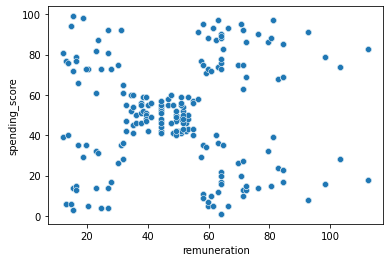

In [40]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score', data=reviews_2)

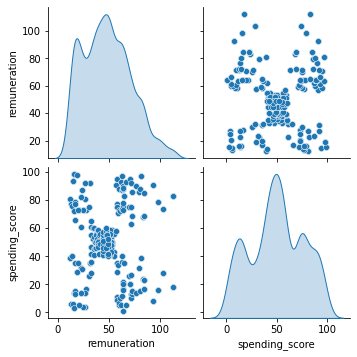

In [41]:
# Create a pairplot with Seaborn.
x = reviews_2[['remuneration','spending_score']]

sns.pairplot(data=reviews_2, vars=x, diag_kind='kde')

## 3. Elbow and silhoutte methods

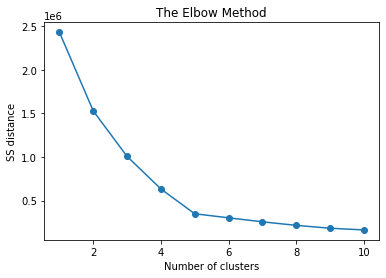

In [42]:
# Determine the number of clusters: Elbow method.

from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

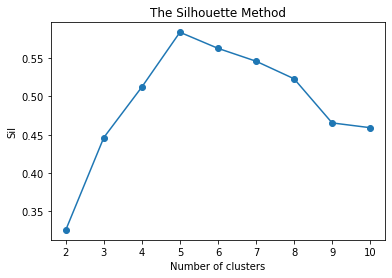

In [43]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

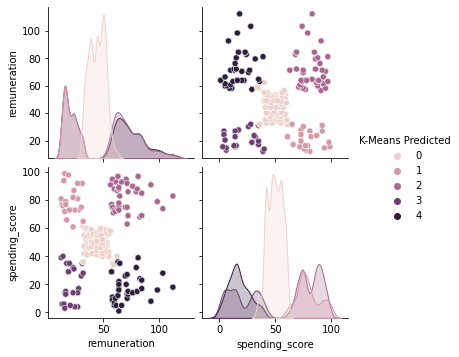

In [44]:
#Using 5 clusters

kmeans = KMeans(n_clusters=5,
                    init = 'k-means++',
                    max_iter = 15000,
                    n_init = 10,
                    random_state = 42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [45]:
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

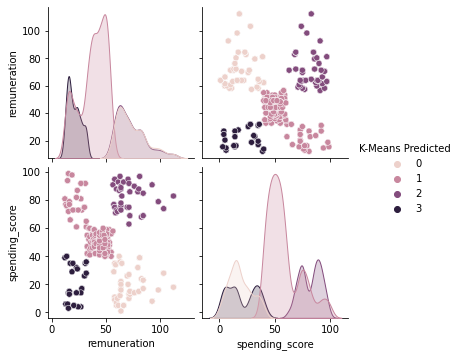

In [46]:
#Using 4 clusters

kmeans = KMeans(n_clusters=4,
                    init = 'k-means++',
                    max_iter = 15000,
                    n_init = 10,
                    random_state = 42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [47]:
x['K-Means Predicted'].value_counts()

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

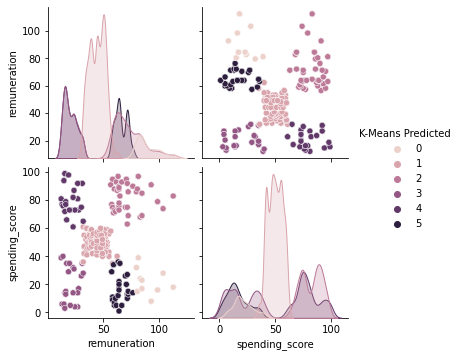

In [48]:
#Using 6 clusters

kmeans = KMeans(n_clusters=6,
                    init = 'k-means++',
                    max_iter = 15000,
                    n_init = 10,
                    random_state = 42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [49]:
x['K-Means Predicted'].value_counts()

1    767
2    356
3    271
4    269
5    214
0    123
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

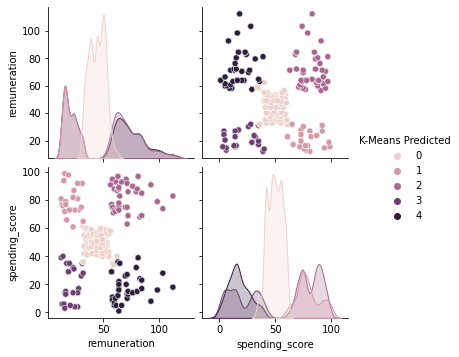

In [50]:
# Apply the final model.
#Using 5 clusters

kmeans = KMeans(n_clusters=5,
                    init = 'k-means++',
                    max_iter = 15000,
                    n_init = 10,
                    random_state = 42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [51]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [52]:
# Visualising the clusters.


# View the DataFrame.


Text(0, 0.5, 'Spending_Score')

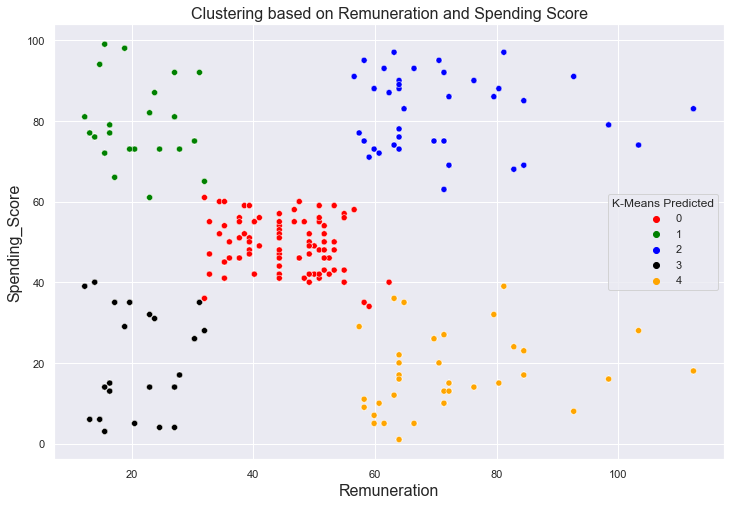

In [53]:
# Visualising the clusters.

sns.set(rc= {'figure.figsize':(12,8)})

sns.scatterplot(data = x, x='remuneration', y = 'spending_score', hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black','orange'])
plt.title("Clustering based on Remuneration and Spending Score", fontsize=16)
plt.xlabel("Remuneration", fontsize=16)
plt.ylabel("Spending_Score", fontsize=16)


## 7. Discuss: Insights and observations

***Your observations here...***

1. We used the clustering method "k-means" to identify groups based on remuneration and spending scores. 
2. Using the Elbow and Silhouette methods, we identified 5 clusters into which we could split the users:
    a. Low Remuneration + Low Spending
    b. High Remuneration + Low Spending
    c. Medium Remuneration + Medium Remuneration 
    d. Low Remuneration + High Spending
    e. High Remuneration + High Spending

3. Based on the above classification, the marketing team can target the different groups accordingly and use targeted marketing campaigns to elevate / maintain users into higher spending groups respectively. 

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [54]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [55]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df3

Unnamed: 0  gender  age  remuneration  spending_score  loyalty_points  \
0              0    Male   18         12.30              39             210   
1              1    Male   23         12.30              81             524   
2              2  Female   22         13.12               6              40   
3              3  Female   25         13.12              77             562   
4              4  Female   33         13.94              40             366   
...          ...     ...  ...           ...             ...             ...   
1995        1995  Female   37         84.46              69            4031   
1996        1996  Female   43         92.66               8             539   
1997        1997    Male   34         92.66              91            5614   
1998        1998    Male   34         98.40              16            1048   
1999        1999    Male   32         92.66               8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 10 columns]

In [56]:
# Explore data set.
print(df3.shape)
print(df3.info())


(2000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB
None


In [57]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review','summary']]

# View DataFrame.
df3

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [58]:
# Determine if there are any missing values.
df3.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [59]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(str.lower)
df3['review']

0       when it comes to a dm's screen, the space on t...
1       an open letter to galeforce9*:\n\nyour unpaint...
2       nice art, nice printing.  why two panels are f...
3       amazing buy! bought it as a gift for our new d...
4       as my review of gf9's previous screens these w...
                              ...                        
1995    the perfect word game for mixed ages (with mom...
1996    great game.  did not think i would like it whe...
1997    great game for all.........\nkeeps the mind ni...
1998                                            fun game!
1999    this game is fun. a lot like scrabble without ...
Name: review, Length: 2000, dtype: object

In [60]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(str.lower)
df3['summary']

0       the fact that 50% of this space is wasted on a...
1       another worthless dungeon master's screen from...
2                         pretty, but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995       the perfect word game for mixed ages (with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [61]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]+', '')
df3['review']
# View output.

0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9\n\nyour unpainted...
2       nice art nice printing  why two panels are fil...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1995    the perfect word game for mixed ages with mom ...
1996    great game  did not think i would like it when...
1997            great game for all\nkeeps the mind nimble
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 2000, dtype: object

In [62]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]+', '')
df3['summary']

# View output.

0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2c) Drop duplicates in both columns

In [63]:
# Drop duplicates in review columns.
print(df3[['review','summary']].duplicated().sum())

# View DataFrame.
df3_clean = df3.drop_duplicates(subset=['review','summary'])

df3_clean.reset_index(inplace=True)
print(df3_clean.shape)
df3_clean.head()

39
(1961, 3)


index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9\n\nyour unpainted...   
2      2  nice art nice printing  why two panels are fil...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

#### *P.S: As there is no data on how the summary was generated, we assume this was also provided by the customers while posting the survey. Hence, while removing duplicates, we have considered review and summary columns together rather than considering only the review columns. 

## 3. Tokenise and create wordclouds

In [64]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nehakarani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
# Create new DataFrame (copy DataFrame).
df4 = df3_clean.copy()

# View DataFrame.
df4

index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9\n\nyour unpainted...   
2         2  nice art nice printing  why two panels are fil...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game  did not think i would like it when...   
1958   1997          great game for all\nkeeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1956      the perfect word game for mixed ages with mom  
1957                                          super fun  
1958                                         great game  
1959                                         four stars  
1960                                     love this game  

[1961 rows x 3 columns]

In [66]:
# Apply tokenisation to both columns.
# View DataFrame.
df4['review'] = df4['review'].apply(word_tokenize)

df4['review']

0       [when, it, comes, to, a, dms, screen, the, spa...
1       [an, open, letter, to, galeforce9, your, unpai...
2       [nice, art, nice, printing, why, two, panels, ...
3       [amazing, buy, bought, it, as, a, gift, for, o...
4       [as, my, review, of, gf9s, previous, screens, ...
                              ...                        
1956    [the, perfect, word, game, for, mixed, ages, w...
1957    [great, game, did, not, think, i, would, like,...
1958    [great, game, for, all, keeps, the, mind, nimble]
1959                                          [fun, game]
1960    [this, game, is, fun, a, lot, like, scrabble, ...
Name: review, Length: 1961, dtype: object

In [67]:
df4['summary'] = df4['summary'].apply(word_tokenize)

df4['summary']

0       [the, fact, that, 50, of, this, space, is, was...
1       [another, worthless, dungeon, masters, screen,...
2                    [pretty, but, also, pretty, useless]
3                                           [five, stars]
4                                           [money, trap]
                              ...                        
1956    [the, perfect, word, game, for, mixed, ages, w...
1957                                         [super, fun]
1958                                        [great, game]
1959                                        [four, stars]
1960                                   [love, this, game]
Name: summary, Length: 1961, dtype: object

In [68]:
# Review: Create a word cloud.
all_reviews =''

for i in range(df3_clean.shape[0]):
    all_reviews = all_reviews + df3_clean['review'][i]
    
all_reviews

'when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completelyan open letter to galeforce9\n\nyour unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which coul


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


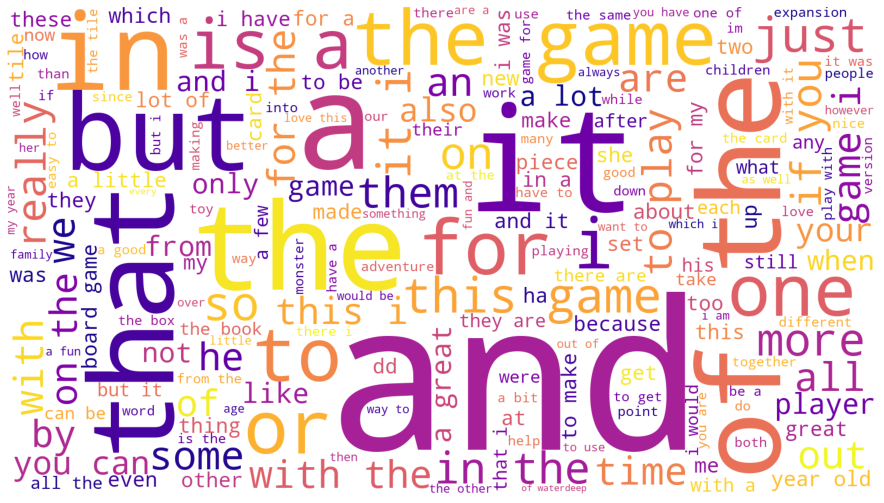

In [69]:
# Review: Plot the WordCloud image.
!pip install WordCloud

from wordcloud import WordCloud

import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 

plt.figure(figsize=(16,9), facecolor= None)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [70]:
# Summary: Create a word cloud.
all_summary =''

for i in range(df3_clean.shape[0]):
    all_summary = all_summary + df3_clean['summary'][i]
    
all_summary

'the fact that 50 of this space is wasted on art and not terribly informative or needed art another worthless dungeon masters screen from galeforce9pretty but also pretty uselessfive starsmoney trapfive starsbest gm screen everfive starsgreat but could be even betteranother missed opportunity  not a value add to the product linefive starslove the mapnot a general dm screenvery weak gamefell completely flatfive starsgood bookbuckley was a card mommervery advanced but as good as it getsyou better know what youre getting intodont botherthe worst value ive ever seennot enough productgood product buttemporary tattoos were good gifthuge hitgorgeous picturesfive starswonderful designswow great coloring booknice bookgreat picturesperfectwell donemy relaxationbeautiful coloring bookthe pictures are great ive done one and gave it to a great buy cant wait to work on this bookstained glass perfectionfour starsso beautifulgreat picturesvery nicefive starsfive starsfive starsfive starsfive starsfive

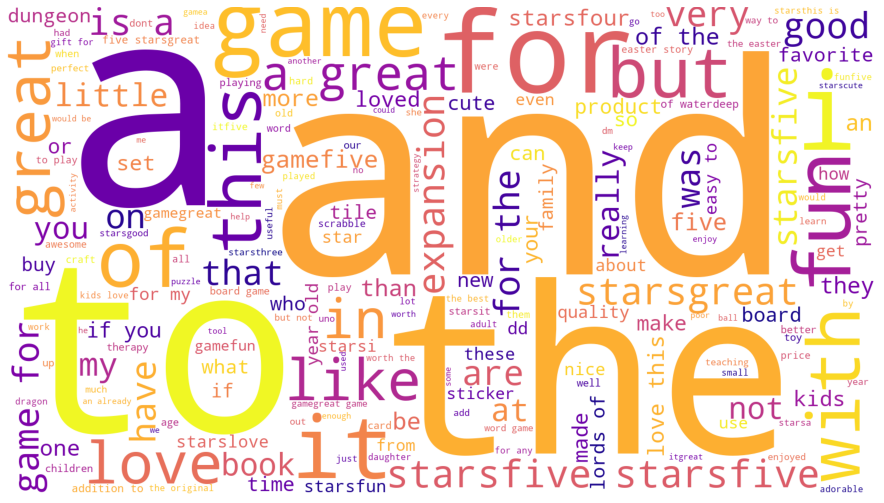

In [71]:
# Summary: Plot the WordCloud image.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

plt.figure(figsize=(16,9), facecolor= None)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

### We can see in the above word clouds that the most frequent words are "and", "the","it","for" etc which are inconsequential. Hence, we remove these words using "English_Stopwords" library and focus only on the relevant words. 

In [72]:
# Determine the frequency distribution.
# All review tokens - rtokens
all_rtokens= []

for i in range(df4.shape[0]):
    all_rtokens = all_rtokens + df4['review'][i]
    
print(len(all_rtokens))
all_rtokens


112124


['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [73]:
# All summary tokens - stokens
all_stokens= []

for i in range(df4.shape[0]):
    all_stokens = all_stokens + df4['summary'][i]
    
print(len(all_stokens))

all_stokens


9281


['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

### 4b) Remove alphanumeric characters and stopwords

In [74]:
# Delete all the alpanum.
rtokens = [word for word in all_rtokens if word.isalnum()]
print(len(rtokens))
rtokens

112116


['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [75]:
stokens = [word for word in all_stokens if word.isalnum()]
print(len(stokens))
stokens

9281


['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

In [76]:
# Remove all the stopwords
nltk.download ('stopwords')

from nltk.corpus import stopwords

english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nehakarani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
rtoken2 = [ x for x in rtokens if x.lower() not in english_stopwords]

print(len(rtoken2))
rtoken2

57660


['comes',
 'dms',
 'screen',
 'space',
 'screen',
 'absolute',
 'premium',
 'fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'well',
 'makes',
 'completely',
 'useless',
 'reason',
 'gave',
 '2',
 'stars',
 '1',
 'technically',
 'speaking',
 'least',
 'still',
 'stand',
 'block',
 'notes',
 'dice',
 'rolls',
 'drops',
 'ball',
 'completely',
 'open',
 'letter',
 'galeforce9',
 'unpainted',
 'miniatures',
 'bad',
 'spell',
 'cards',
 'great',
 'board',
 'games',
 'meh',
 'dm',
 'screens',
 'however',
 'freaking',
 'terrible',
 'im',
 'still',
 'waiting',
 'single',
 'screen',
 'isnt',
 'polluted',
 'pointless',
 'artwork',
 'useful',
 'referenceable',
 'tables',
 'youve',
 'created',
 'single',
 'use',
 'screen',
 'useful',
 'running',
 'storm',
 'kings',
 'thunder',
 'adventure',
 'even',
 'despite',
 'fact',
 'geared',
 'adventure',
 'path',
 'usefulness',
 'negligible',
 'best',
 'massive',
 'swath',
 'inner',
 'panel',
 'wasted',
 'artwork

In [78]:
stoken2 = [ x for x in stokens if x.lower() not in english_stopwords]

print(len(stoken2))
stoken2

6138


['fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'galeforce9',
 'pretty',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'could',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'value',
 'add',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'map',
 'general',
 'dm',
 'screen',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'card',
 'mommer',
 'advanced',
 'good',
 'gets',
 'better',
 'know',
 'youre',
 'getting',
 'dont',
 'bother',
 'worst',
 'value',
 'ive',
 'ever',
 'seen',
 'enough',
 'product',
 'good',
 'product',
 'temporary',
 'tattoos',
 'good',
 'gift',
 'huge',
 'hit',
 'gorgeous',
 'pictures',
 'five',
 'stars',
 'wonderful',
 'designs',
 'wow',
 'great',
 'coloring',
 'book',
 'nice',
 'book',

### 4c) Create wordcloud without stopwords

In [79]:
# Create a wordcloud without stop words.
rtoken2_string = ''

for i in rtoken2:
    rtoken2_string = rtoken2_string + i + ' '

rtoken2_string

'comes dms screen space screen absolute premium fact 50 space wasted art terribly informative needed art well makes completely useless reason gave 2 stars 1 technically speaking least still stand block notes dice rolls drops ball completely open letter galeforce9 unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless short stop making crap dm screens nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste dont understand cant make dm screens useful kinds adventures rather solely specific adventure youre supposed able transpose adventure lands outside forgot

In [80]:
stoken2_string = ''

for i in stoken2:
    stoken2_string = stoken2_string + i + ' '

stoken2_string

'fact 50 space wasted art terribly informative needed art another worthless dungeon masters screen galeforce9 pretty also pretty useless five stars money trap five stars best gm screen ever five stars great could even better another missed opportunity value add product line five stars love map general dm screen weak game fell completely flat five stars good book buckley card mommer advanced good gets better know youre getting dont bother worst value ive ever seen enough product good product temporary tattoos good gift huge hit gorgeous pictures five stars wonderful designs wow great coloring book nice book great pictures perfect well done relaxation beautiful coloring book pictures great ive done one gave great buy cant wait work book stained glass perfection four stars beautiful great pictures nice five stars five stars five stars five stars five stars five stars four stars three stars like every image contained stained glass coloring book creative stained glass pictures nice pictures

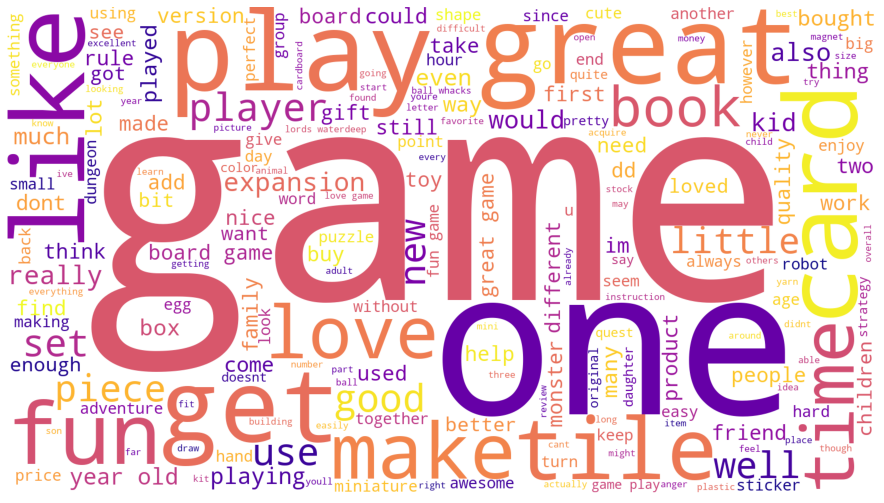

In [81]:
# Plot the wordcloud image.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(rtoken2_string) 

plt.figure(figsize=(16,9), facecolor= None)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

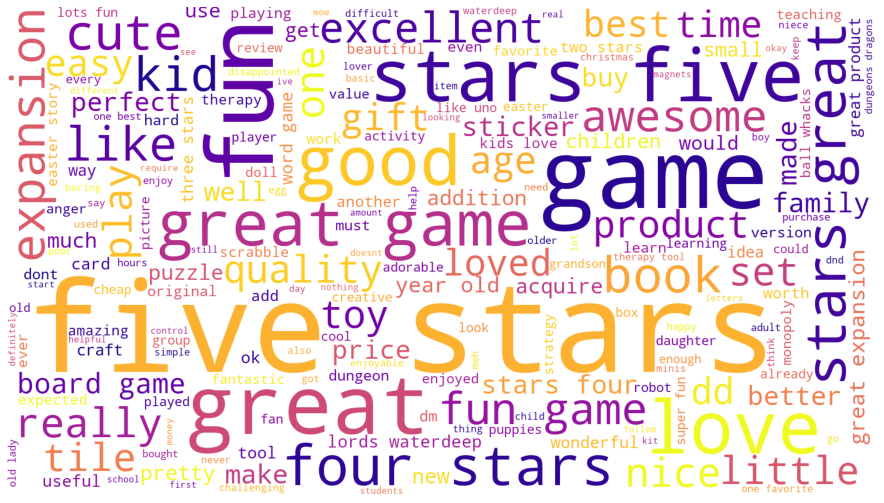

In [82]:
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(stoken2_string) 

plt.figure(figsize=(16,9), facecolor= None)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### 4d) Identify 15 most common words and polarity

In [83]:
# Determine the 15 most common words in reveiw
fdist_review = FreqDist(rtoken2)

# Preview the data.
fdist_review

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [84]:
from collections import Counter

review_words = pd.DataFrame(Counter(rtoken2).most_common(15), columns=['Word', 'Frequency']).set_index('Word')
review_words

Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

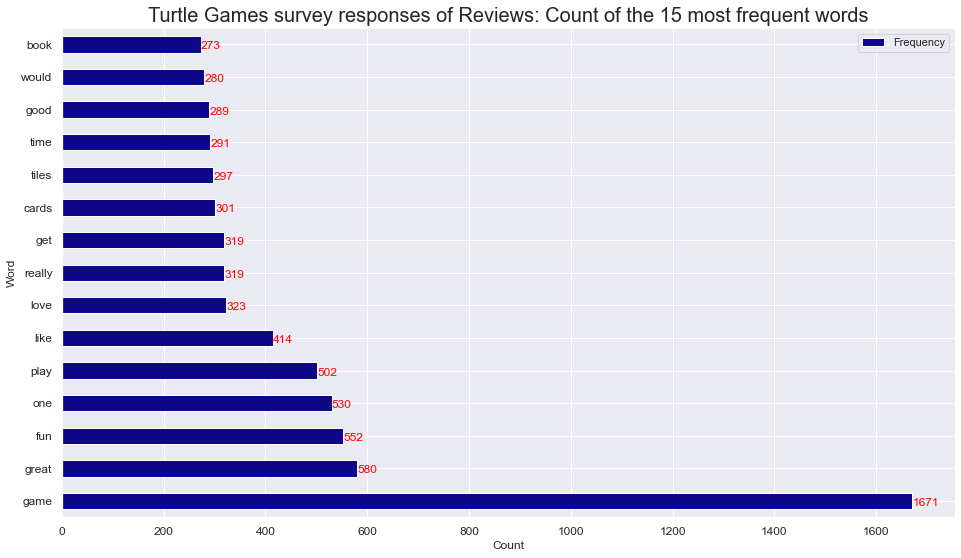

In [85]:
# Set the plot type.
ax = review_words.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Games survey responses of Reviews: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [86]:
# Determine the 15 most common words in summary
fdist_summary = FreqDist(stoken2)

# Preview the data.
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [87]:
from collections import Counter

summary_words = pd.DataFrame(Counter(stoken2).most_common(15), columns=['Word', 'Frequency']).set_index('Word')
summary_words

Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

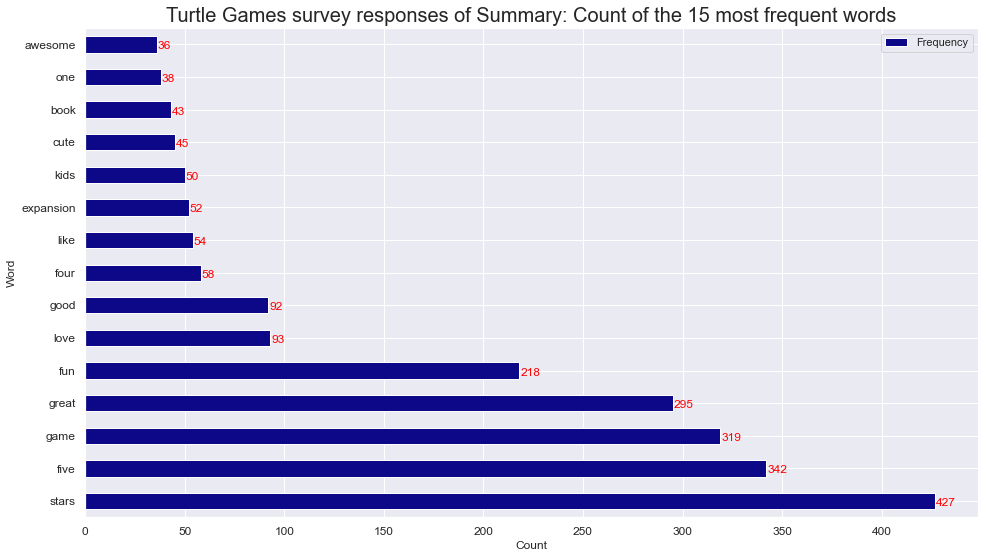

In [88]:
# Set the plot type.
ax = summary_words.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Games survey responses of Summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [89]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [90]:
# Determine polarity of both columns. 
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

df3_clean['polarity_review'] = df3_clean['review'].apply(generate_polarity)
df3_clean['polarity_summary'] = df3_clean['summary'].apply(generate_polarity)
df3_clean.head()

# View output.


index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9\n\nyour unpainted...   
2      2  nice art nice printing  why two panels are fil...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  polarity_review  \
0  the fact that 50 of this space is wasted on ar...        -0.036111   
1  another worthless dungeon masters screen from ...         0.035952   
2                     pretty but also pretty useless         0.116640   
3                                         five stars         0.578788   
4                                         money trap        -0.316667   

   polarity_summary  
0              0.15  
1             -0.80  
2              0.00  
3              0.00  
4              0.00

In [91]:
# Determine the subjectivity of both columns. 
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

df3_clean['subjectivity_review'] = df3_clean['review'].apply(generate_subjectivity)
df3_clean['subjectivity_summary'] = df3_clean['summary'].apply(generate_subjectivity)
df3_clean.head()

# View output.



index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9\n\nyour unpainted...   
2      2  nice art nice printing  why two panels are fil...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  polarity_review  \
0  the fact that 50 of this space is wasted on ar...        -0.036111   
1  another worthless dungeon masters screen from ...         0.035952   
2                     pretty but also pretty useless         0.116640   
3                                         five stars         0.578788   
4                                         money trap        -0.316667   

   polarity_summary  subjectivity_review  subjectivity_summary  
0              0.15             0.486111              0.500000  
1             -0.80             0.442976              0.900000  
2              0.00             0.430435              0.733333  
3              0.00             0.784848              0.000000  
4              0.00             0.316667              0.000000

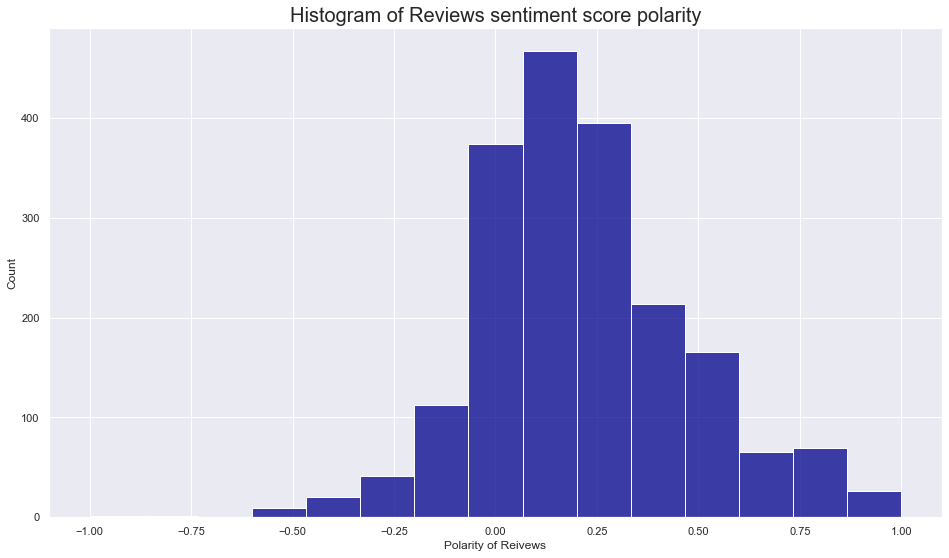

In [92]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Histogram of sentiment score

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
plot = sns.histplot(data = df3_clean, x='polarity_review', color='darkblue', bins=15)

plt.xlabel('Polarity of Reivews', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Reviews sentiment score polarity', fontsize=20)

plt.show()


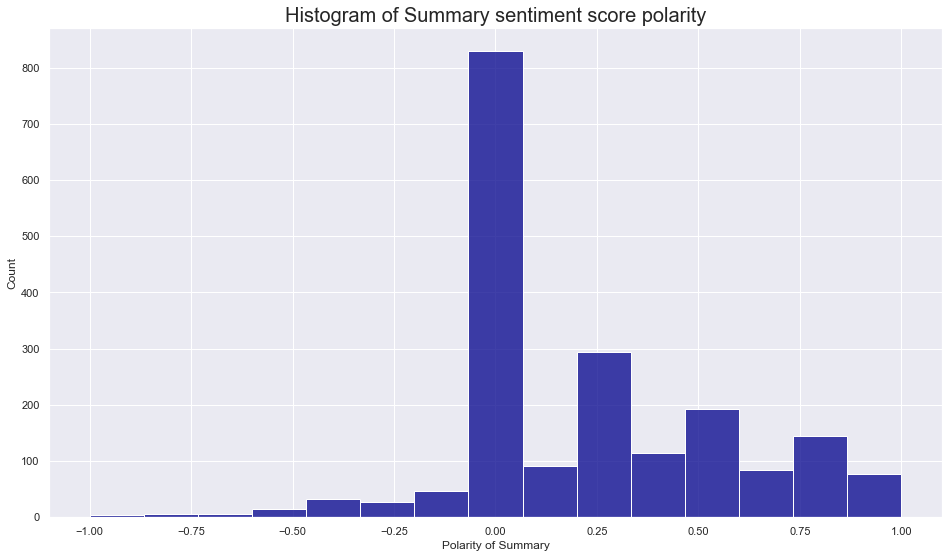

In [93]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
plot = sns.histplot(data = df3_clean, x='polarity_summary', color='darkblue', bins=15)

plt.xlabel('Polarity of Summary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Summary sentiment score polarity', fontsize=20)

plt.show()



# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [94]:
# Top 20 negative reviews.
negative_reviews = df3_clean.nsmallest(20, 'polarity_review')

# View output.
negative_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

In [95]:
# Top 20 negative summaries.
negative_summary = df3_clean.nsmallest(20, 'polarity_summary')

# View output.
negative_summary.style.set_properties(subset=['review'], **{'width': '600px'})


In [96]:
# Top 20 positive reviews.
positive_reviews = df3_clean.nlargest(20, 'polarity_review')

# View output.
positive_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

In [97]:
# Top 20 positive summaries.
positive_summary = df3_clean.nlargest(20, 'polarity_summary')

# View output.
positive_summary.style.set_properties(subset=['review'], **{'width': '600px'})


### Since our biggest improvement can come from negative feedback, we deep-dived further into the negative reviews to explore and find any recurrent theme

In [98]:
df3_negative = df3_clean.loc[(df3_clean['polarity_review'] < 0)].reset_index()
df3_negative.style.set_properties(subset=['review'], **{'width': '600px'})


In [99]:
df3_negative['review'] = df3_negative['review'].apply(word_tokenize)

df3_negative['review']

0      [when, it, comes, to, a, dms, screen, the, spa...
1      [as, my, review, of, gf9s, previous, screens, ...
2      [this, is, one, of, the, worst, games, i, have...
3                     [very, fun, game, for, my, family]
4      [i, dont, know, how, well, they, work, if, the...
                             ...                        
298                                          [fun, game]
299    [what, a, fun, game, someone, brought, this, t...
300                           [addicted, to, this, game]
301                                          [fun, game]
302    [this, game, is, fun, a, lot, like, scrabble, ...
Name: review, Length: 303, dtype: object

In [100]:
# All negative review tokens - negative_tokens
all_negative_tokens= []

for i in range(df3_negative.shape[0]):
    all_negative_tokens = all_negative_tokens + df3_negative['review'][i]
    
print(len(all_negative_tokens))
all_negative_tokens

18046


['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'as',
 'my',
 'review',
 'of',
 'gf9s',
 'previous',
 'screens',
 'these',
 'were',
 'completely',
 'unnecessary',
 'and',
 'nearly',
 'useless',
 'skip',
 'them',
 'this',
 'is',
 'the',
 'definition',
 'of',
 'a',
 'waste',
 'of',
 'money',
 'this',
 'is',
 'one',
 'of',
 

In [101]:
# Delete all the alphanum.
negativetokens_alphanum = [word for word in all_negative_tokens if word.isalnum()]
print(len(negativetokens_alphanum))
negativetokens_alphanum

18045


['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'as',
 'my',
 'review',
 'of',
 'gf9s',
 'previous',
 'screens',
 'these',
 'were',
 'completely',
 'unnecessary',
 'and',
 'nearly',
 'useless',
 'skip',
 'them',
 'this',
 'is',
 'the',
 'definition',
 'of',
 'a',
 'waste',
 'of',
 'money',
 'this',
 'is',
 'one',
 'of',
 

In [102]:
negativetokens = [ x for x in negativetokens_alphanum if x.lower() not in english_stopwords]

print(len(negativetokens))
negativetokens

9267


['comes',
 'dms',
 'screen',
 'space',
 'screen',
 'absolute',
 'premium',
 'fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'well',
 'makes',
 'completely',
 'useless',
 'reason',
 'gave',
 '2',
 'stars',
 '1',
 'technically',
 'speaking',
 'least',
 'still',
 'stand',
 'block',
 'notes',
 'dice',
 'rolls',
 'drops',
 'ball',
 'completely',
 'review',
 'gf9s',
 'previous',
 'screens',
 'completely',
 'unnecessary',
 'nearly',
 'useless',
 'skip',
 'definition',
 'waste',
 'money',
 'one',
 'worst',
 'games',
 'ever',
 'played',
 'basically',
 'come',
 'puns',
 'spot',
 'puns',
 'generally',
 'pretty',
 'bad',
 'generate',
 'puns',
 'worse',
 'run',
 'mill',
 'groaners',
 'cant',
 'imagine',
 'many',
 'people',
 'enjoying',
 'slow',
 'paced',
 'generally',
 'generate',
 'level',
 'enjoyment',
 'unless',
 'youre',
 'skilled',
 'english',
 'language',
 'fun',
 'game',
 'family',
 'dont',
 'know',
 'well',
 'work',
 'theyre',
 'miracle',
 'theyr

In [103]:
negativetokens_string = ''

for i in negativetokens:
    negativetokens_string = negativetokens_string + i + ' '
    
negativetokens_string

'comes dms screen space screen absolute premium fact 50 space wasted art terribly informative needed art well makes completely useless reason gave 2 stars 1 technically speaking least still stand block notes dice rolls drops ball completely review gf9s previous screens completely unnecessary nearly useless skip definition waste money one worst games ever played basically come puns spot puns generally pretty bad generate puns worse run mill groaners cant imagine many people enjoying slow paced generally generate level enjoyment unless youre skilled english language fun game family dont know well work theyre miracle theyre expensive quantity opened thought theyd forgotten send tatoos 10 350 makes ultimate skimpy product 5 stars delivery got 2 days ordered wow coloring book pages perforated see crayons pencils show side putting cardboard thick piece paper pages avoid drawings nice put windows done thus perforated pages thin paper although 199 isnt much disappointing see small booklet 4 pa

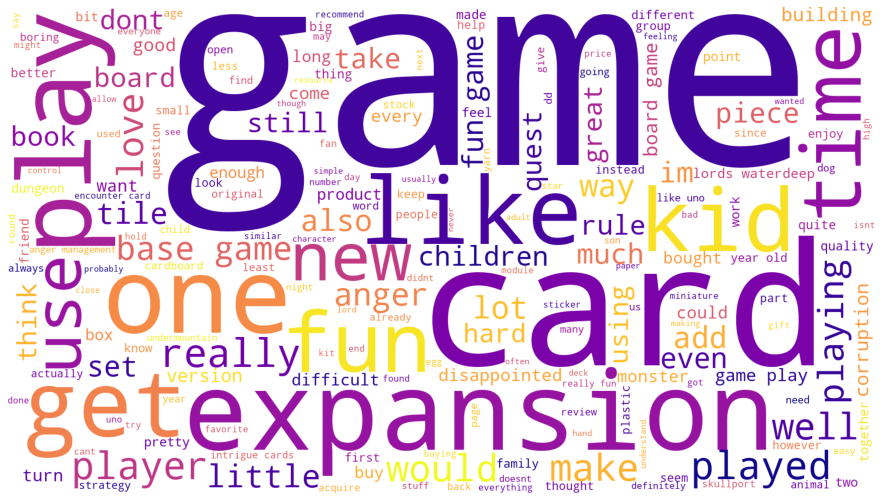

In [104]:
# Summary: Plot the WordCloud image.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(negativetokens_string) 

plt.figure(figsize=(16,9), facecolor= None)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [105]:
df3_negative['summary'] = df3_negative['summary'].apply(word_tokenize)

df3_negative['summary']

0      [the, fact, that, 50, of, this, space, is, was...
1                                          [money, trap]
2                                     [very, weak, game]
3                                          [five, stars]
4                                         [dont, bother]
                             ...                        
298                                       [three, stars]
299    [great, for, fans, of, scrabble, and, crosswor...
300                                        [five, stars]
301                                        [four, stars]
302                                   [love, this, game]
Name: summary, Length: 303, dtype: object

In [106]:
# All negative summary tokens - negative_tokens
all_negative_stokens= []

for i in range(df3_negative.shape[0]):
    all_negative_stokens = all_negative_stokens + df3_negative['summary'][i]
    
print(len(all_negative_stokens))
all_negative_stokens

1558


['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'money',
 'trap',
 'very',
 'weak',
 'game',
 'five',
 'stars',
 'dont',
 'bother',
 'drawings',
 'are',
 'nice',
 'and',
 'you',
 'can',
 'put',
 'them',
 'in',
 'your',
 'windows',
 'when',
 'should',
 'be',
 'a',
 'buck',
 'at',
 'dollar',
 'store',
 'really',
 'small',
 'disappointed',
 'one',
 'star',
 'getting',
 'a',
 'surprising',
 'amount',
 'of',
 'use',
 'out',
 'of',
 'this',
 'little',
 'thing',
 'five',
 'stars',
 'smaller',
 'than',
 'thought',
 'small',
 'and',
 'boring',
 'hey',
 'robots',
 'are',
 'cool',
 'stickers',
 'i',
 'thought',
 'wow',
 'its',
 'ok',
 'smaller',
 'than',
 'life',
 'doesnt',
 'hold',
 'up',
 'well',
 'picture',
 'part',
 'was',
 'good',
 'but',
 'there',
 'were',
 'no',
 'pencils',
 'five',
 'stars',
 'horrible',
 'nothing',
 'more',
 'to',
 'say',
 'would',
 'give',
 'zero',
 'stars

In [107]:
#Removing all the english stopwords
negative_stokens = [ x for x in all_negative_stokens if x.lower() not in english_stopwords]

print(len(negative_stokens))
negative_stokens

980


['fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'money',
 'trap',
 'weak',
 'game',
 'five',
 'stars',
 'dont',
 'bother',
 'drawings',
 'nice',
 'put',
 'windows',
 'buck',
 'dollar',
 'store',
 'really',
 'small',
 'disappointed',
 'one',
 'star',
 'getting',
 'surprising',
 'amount',
 'use',
 'little',
 'thing',
 'five',
 'stars',
 'smaller',
 'thought',
 'small',
 'boring',
 'hey',
 'robots',
 'cool',
 'stickers',
 'thought',
 'wow',
 'ok',
 'smaller',
 'life',
 'doesnt',
 'hold',
 'well',
 'picture',
 'part',
 'good',
 'pencils',
 'five',
 'stars',
 'horrible',
 'nothing',
 'say',
 'would',
 'give',
 'zero',
 'stars',
 'faulty',
 'product',
 'age',
 '31',
 'found',
 'difficult',
 'make',
 'incomplete',
 'kit',
 'incomplete',
 'cute',
 'idea',
 'hard',
 'looks',
 'cuter',
 'boring',
 'unless',
 'craft',
 'person',
 'four',
 'stars',
 'two',
 'stars',
 'three',
 'stars',
 'two',
 'stars',
 'four',
 'stars',
 'instructions',
 'little',
 '

In [108]:
negative_stokens_string = ''

for i in negative_stokens:
    negative_stokens_string = negative_stokens_string + i + ' '
    
negative_stokens_string

'fact 50 space wasted art terribly informative needed art money trap weak game five stars dont bother drawings nice put windows buck dollar store really small disappointed one star getting surprising amount use little thing five stars smaller thought small boring hey robots cool stickers thought wow ok smaller life doesnt hold well picture part good pencils five stars horrible nothing say would give zero stars faulty product age 31 found difficult make incomplete kit incomplete cute idea hard looks cuter boring unless craft person four stars two stars three stars two stars four stars instructions little tricky understand really annoying click pink things together four stars enough yarn frustrating disappointed 9 year old fun complex think might cute included two stars three stars one star person bought didnt like hard perfect gift someone hate three stars dont try recreate photos disappointed enough yarn complete frustating excited try difficult execute worth money great therapy game g

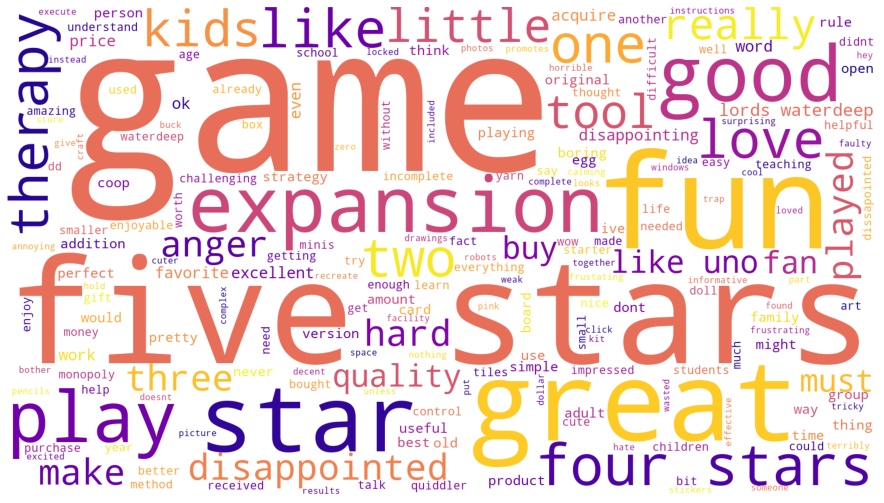

In [109]:
# Summary: Plot the WordCloud image.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(negative_stokens_string) 

plt.figure(figsize=(16,9), facecolor= None)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## 7. Discuss: Insights and observations

***Your observations here...***

1. Overall, we can see from the histogram plot that most of the reviews and summary are closer to neutral but there is more distribution towards the positive side, indicating that in general the sentiment is positive. 

2. From the word clouds formed for reviews and summary, we can see that most of the common words are positive like "great", "fun", "love", "five stars". This was further confirmed from the frequency distribution plot of the most common words. 

3. We did some deep dive into just the negative reviews to try and find the most common negative words so we could perhaps improve on those fronts. However, our analysis did not yield any conclusive guide to look into. Some of the  negative words that were slightly frequent out of the negative reviews were "anger", "expansion", "disappointed", "difficult","hard" etc. 

# 